In [1]:
from matplotlib import pyplot as plt

print(plt.tripcolor.__doc__)


    Create a pseudocolor plot of an unstructured triangular grid.

    Call signatures::

      tripcolor(triangulation, c, *, ...)
      tripcolor(x, y, c, *, [triangles=triangles], [mask=mask], ...)

    The triangular grid can be specified either by passing a `.Triangulation`
    object as the first parameter, or by passing the points *x*, *y* and
    optionally the *triangles* and a *mask*. See `.Triangulation` for an
    explanation of these parameters.

    It is possible to pass the triangles positionally, i.e.
    ``tripcolor(x, y, triangles, c, ...)``. However, this is discouraged.
    For more clarity, pass *triangles* via keyword argument.

    If neither of *triangulation* or *triangles* are given, the triangulation
    is calculated on the fly. In this case, it does not make sense to provide
    colors at the triangle faces via *c* or *facecolors* because there are
    multiple possible triangulations for a group of points and you don't know
    which triangles will be co

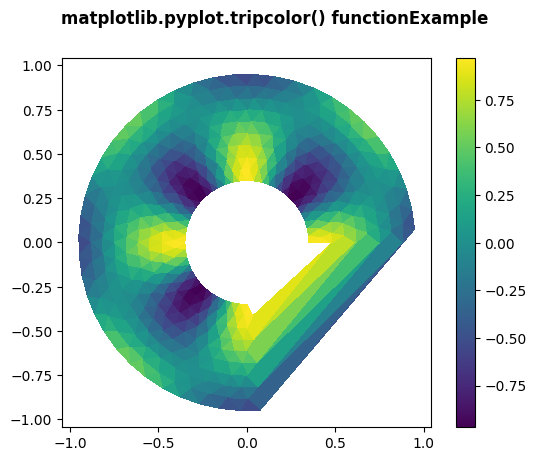

In [2]:
# Implementation of matplotlib function
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np


ang = 40
rad = 10
radm = 0.35
radii = np.linspace(radm, 0.95, rad)

angles = np.linspace(0, 1.5 * np.pi, ang)
angles = np.repeat(angles[..., np.newaxis], rad,
				axis = 1)

angles[:, 1::2] += np.pi / ang

x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = (np.sin(4 * radii) * np.cos(4 * angles)).flatten()

triang = tri.Triangulation(x, y)
triang.set_mask(np.hypot(x[triang.triangles].mean(axis = 1),
						y[triang.triangles].mean(axis = 1))
				< radm)

fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
tpc = ax1.tripcolor(triang, z, shading ='flat')
fig1.colorbar(tpc)

fig1.suptitle('matplotlib.pyplot.tripcolor() function\
Example\n\n', fontweight ="bold")
plt.show()
